In [232]:
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

In [233]:
iris_data_set = load_iris(return_X_y=True, as_frame=True)
iris = iris_data_set[0]
data = pd.DataFrame(iris)
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
data.columns = features
data["type"] = iris_data_set[1]

In [234]:
# Reduce the classes from 3 to 2 to perform binary classification
# Class_discarded 0
class_discarded = 0

binary_data = data[data["type"] != class_discarded]
print(f"The data is: {binary_data}")

The data is:      sepal_length  sepal_width  petal_length  petal_width  type
50            7.0          3.2           4.7          1.4     1
51            6.4          3.2           4.5          1.5     1
52            6.9          3.1           4.9          1.5     1
53            5.5          2.3           4.0          1.3     1
54            6.5          2.8           4.6          1.5     1
..            ...          ...           ...          ...   ...
145           6.7          3.0           5.2          2.3     2
146           6.3          2.5           5.0          1.9     2
147           6.5          3.0           5.2          2.0     2
148           6.2          3.4           5.4          2.3     2
149           5.9          3.0           5.1          1.8     2

[100 rows x 5 columns]


In [235]:
# Train Test split

train, test = train_test_split(binary_data, test_size = 0.8)
print(f"Train: {len(train)}, Test:{len(test)}")

Train: 20, Test:80


In [236]:
# Choose Classifier
# Create Classifier


classifier = LogisticRegression(
    penalty= "l2",
    solver= "liblinear",
    max_iter= 100,
    n_jobs= 4,
    random_state= 0
)

In [237]:
classifier.fit(train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], train['type'])

# Number of iterations until the MLE process converged.
print('The classifier was correctly fit given the',len(train), 'records of training data.')
print('* The classifier optimisation MLE process took', classifier.n_iter_[0], 'iterations to converge')
print('* The intercept of the Logistic Regression is:',classifier.intercept_[0])
print('* And the coefficients for each feature are:',classifier.coef_[0])

The classifier was correctly fit given the 20 records of training data.
* The classifier optimisation MLE process took 4 iterations to converge
* The intercept of the Logistic Regression is: -0.3757552634468752
* And the coefficients for each feature are: [-1.1195978   0.05340832  1.17077847  1.04363327]


c:\Users\vasil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(


In [238]:
# Print Sigmoid Function:
def print_sigmoid_function(classifier):
    formula = str(round(classifier.intercept_[0], 2))
    for coef, column in zip(classifier.coef_[0], features):
        formula += ' + (' + str(round(coef, 2)) + '*' + column +')'
    print('The expit function, used to transform the odds into class probabilities, is: type=1/(1+e^(-F))')
    print('Where F is: F=',formula)

print_sigmoid_function(classifier)

The expit function, used to transform the odds into class probabilities, is: type=1/(1+e^(-F))
Where F is: F= -0.38 + (-1.12*sepal_length) + (0.05*sepal_width) + (1.17*petal_length) + (1.04*petal_width)


In [239]:
# The predictions of the classifier:
preds = classifier.predict(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
print(f"The predictions of the classifier are: {list(preds)}")
print(f"The real testing data: {list(test['type'])}")

The predictions of the classifier are: [1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2]
The real testing data: [1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2]


In [240]:
# Compare the predictions with the test data
right = 0

for real, pred in zip(test['type'], preds):
    if real == pred:
        right += 1
print(f"Correct guess: {right}/{len(preds)}, ({round(100*right/len(preds), 2)}%)")

Correct guess: 73/80, (91.25%)


In [241]:
# Using the intercept and coefficients, we can calculate the probability for the test record to belong to a class

types = []

test_values = test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
for v in test_values:
    f = classifier.intercept_[0] + sum(val*coef for val, coef in zip(v, classifier.coef_[0]))
    p = 1/(1 + math.exp(-f))
    types.append(round(p, 4))

prob = list(zip(types, test['type']))

# First 10 values:
print(prob[:10])

[(0.3105, 1), (0.8302, 2), (0.7614, 2), (0.6881, 2), (0.8185, 2), (0.7905, 2), (0.5458, 2), (0.7213, 2), (0.3189, 1), (0.3445, 1)]


In [242]:
NUM_PROB_PREDS_TO_PRINT = 10

print('When sklearn calculates the probabilities, it does for the two classes: The 2 values in each prediction sum 1. The second value is what we calculated above:')
pred_probs = classifier.predict_proba(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
print('Printing the first',NUM_PROB_PREDS_TO_PRINT,'values:')
print(pred_probs[:NUM_PROB_PREDS_TO_PRINT])

When sklearn calculates the probabilities, it does for the two classes: The 2 values in each prediction sum 1. The second value is what we calculated above:
Printing the first 10 values:
[[0.68953569 0.31046431]
 [0.16982234 0.83017766]
 [0.23856517 0.76143483]
 [0.31194317 0.68805683]
 [0.18149634 0.81850366]
 [0.20947028 0.79052972]
 [0.45420522 0.54579478]
 [0.27868259 0.72131741]
 [0.68106138 0.31893862]
 [0.65551847 0.34448153]]


Correctly guessed: 73 / 80 ( 91.25 %)


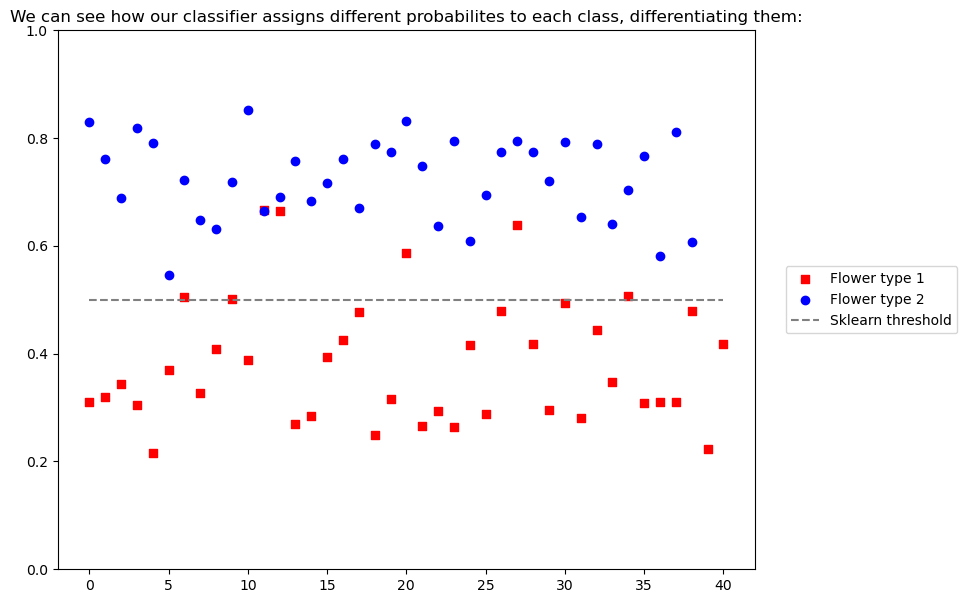

In [243]:
# Plot the data 
# Threshold 0.5
def plot_prediction_probs_with_real_class(prob, PROBABILITY_THRESHOLD=None):
    ones = []
    twos = []
    first_class = None
    second_class = None
    for probs, real in prob:
        if not first_class:
            first_class = real
        if not second_class and real != first_class:
            second_class = real
        if real == first_class:
            ones.append(probs)
        else:
            twos.append(probs)

    fig = plt.figure(figsize=(9, 7))
    ax1 = fig.add_subplot(111)

    ax1.scatter(x=range(len(ones)), y=ones, c='red', marker='s', label='Flower type '+str(first_class))
    ax1.scatter(x=range(len(twos)), y=twos, c='blue', marker='o', label='Flower type '+str(second_class))
    items_in_x_axis = max(len(ones), len(twos))
    ax1.plot(range(items_in_x_axis), 
             [0.5]*items_in_x_axis, 
             color='grey', 
             linestyle='--',
             label='Sklearn threshold'
            )
    if PROBABILITY_THRESHOLD:
        ax1.plot(range(items_in_x_axis), 
                 [PROBABILITY_THRESHOLD]*items_in_x_axis, 
                 color='black', 
                 linewidth=1.5,
                 linestyle='--',
                 label='Our new threshold'
                )

    plt.title('We can see how our classifier assigns different probabilites to each class, differentiating them:')
    plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.5));
    plt.ylim(0, 1)
    plt.show()
    
print('Correctly guessed:', right, '/',len(preds),'(', round(100*right/len(preds), 2), '%)')
plot_prediction_probs_with_real_class(prob)

Correctly guessed with new threshold: 75 / 80 ( 93.75 %)


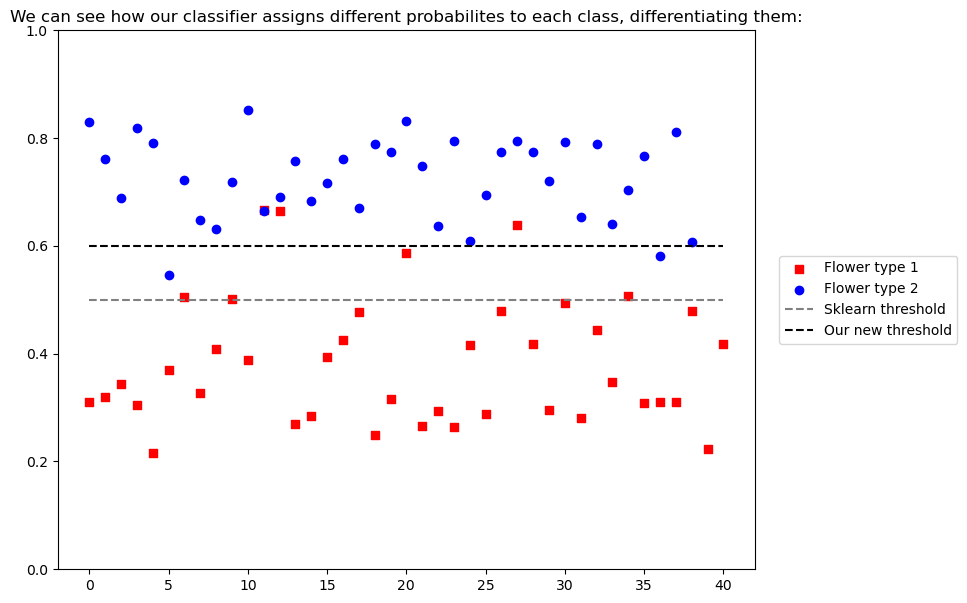

In [246]:
PROBABILITY_THRESHOLD = 0.6

classes = classifier.classes_
right_predictions = 0
for proba, real in prob:
    if proba > PROBABILITY_THRESHOLD:
        prediction=classes[-1]
    else:
        prediction=classes[0]
    if prediction==real:
        right_predictions+=1
print('Correctly guessed with new threshold:', 
      right_predictions, '/',len(preds),'(', round(100*right_predictions/len(preds), 2), '%)')


plot_prediction_probs_with_real_class(prob, PROBABILITY_THRESHOLD)

In [247]:
# Do some statistical feature selection to see which features explain the target (flower type)
# and which ones don't. We use the Chi-squared test for that:

from sklearn.feature_selection import chi2

scores, pvalues = chi2(train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], train['type'])

In [248]:
# The p-value for sepal_width is very high, indicating that it is the most independent from the class. 
# In other words, it seems like sepal_width is the feature adding the least information to differentiate 
# classes 1 and 2.
list(zip(features, pvalues))

[('sepal_length', 0.7210733686107913),
 ('sepal_width', 0.6282966765631433),
 ('petal_length', 0.23986886278813713),
 ('petal_width', 0.24654163290220243)]

In [250]:
list(zip(features, scores))
features = [
    'sepal_length', 
#     'sepal_width', 
    'petal_length', 
    'petal_width'
]

In [251]:
classifier2 = LogisticRegression(
    random_state=0, penalty='l2'
)
classifier2.fit(train[features], train['type'])

LogisticRegression(random_state=0)

In [252]:
default_preds = classifier2.predict(test[features])
right_predictions = 0
for pred, real in zip(default_preds, test['type']):
    if pred==real:
        right_predictions+=1
print('Correctly guessed with default threshold of 0.5 :', right_predictions, '/',len(default_preds),'(', round(100*right_predictions/len(default_preds), 2), '%)')    

Correctly guessed with default threshold of 0.5 : 75 / 80 ( 93.75 %)


Correctly guessed with thresold of  0.38 : 72 / 80 ( 90.0 %)


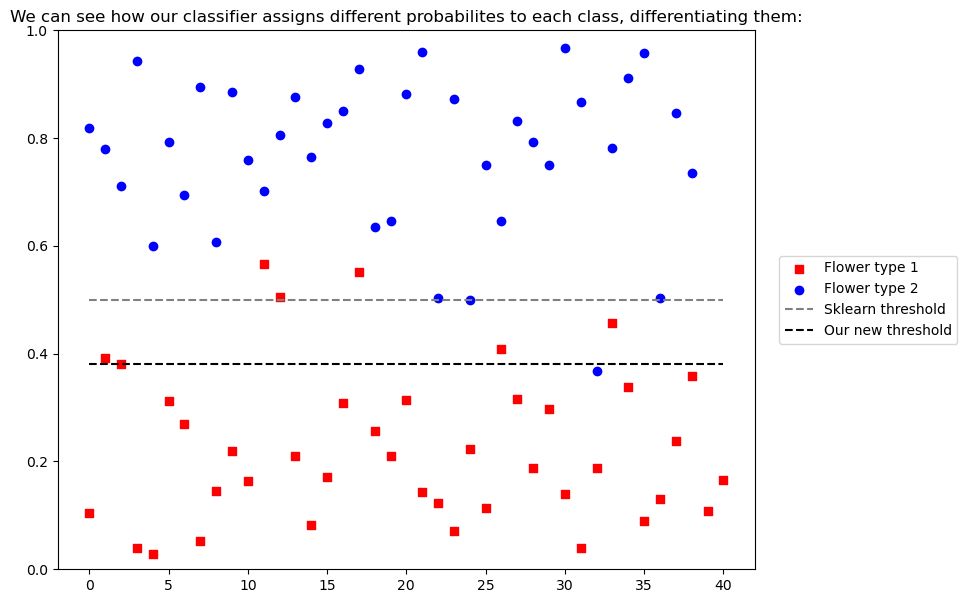

In [253]:
# Now we predict again but getting the probabilities so we can plot the predictions
preds = classifier2.predict_proba(test[features])

PROBABILITY_THRESHOLD_2 = 0.38

prob_reals_2 = []
classes = classifier.classes_
right_predictions = 0
for probs, real in zip(preds, test['type']):
    prob_reals_2.append((probs[1], real))
    if probs[1] > PROBABILITY_THRESHOLD_2:
        prediction=classes[-1]
    else:
        prediction=classes[0]
    if prediction==real:
        right_predictions+=1
print('Correctly guessed with thresold of ', PROBABILITY_THRESHOLD_2,':', right_predictions, '/',len(preds),'(', round(100*right_predictions/len(preds), 2), '%)')

plot_prediction_probs_with_real_class(prob_reals_2, PROBABILITY_THRESHOLD_2)

